Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Data Collection and Analysis

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
#0--> Non-diabetec
#0--> Diabetec

In [10]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


X and Y arrays

In [11]:
X = df.drop(columns="Outcome", axis=1)
Y = df["Outcome"]

Data Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn import svm

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [18]:
standardized_data = scaler.transform(X)

In [19]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [20]:
X
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [21]:
X=standardized_data

In [22]:

Y = df["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=101)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [26]:
X_test

array([[-1.14185152, -0.5287506 , -0.26394125, ...,  0.20401277,
         0.11513809, -0.95646168],
       [ 1.23388019, -0.43485916,  0.56322275, ..., -0.93826044,
         1.16009915,  0.06459135],
       [-0.84488505, -0.68523633, -0.57412775, ..., -0.83672504,
         0.23896296, -1.04154944],
       ...,
       [-0.54791859,  0.19108374, -0.57412775, ..., -0.54481078,
         3.40706745, -0.70119842],
       [ 0.04601433, -0.68523633,  0.35643175, ..., -1.11594738,
        -0.75163597, -1.04154944],
       [ 0.63994726, -1.06080207,  0.56322275, ..., -1.11594738,
        -1.17143246, -0.10558415]])

In [27]:
X_train

array([[ 0.3429808 ,  1.16129525,  0.04624525, ..., -0.27828036,
        -0.79995787,  2.5321362 ],
       [-0.54791859,  0.09719231, -0.05715025, ...,  0.1151693 ,
         1.21748141, -0.27575966],
       [-0.54791859,  0.56664949,  0.304734  , ..., -0.81134119,
        -0.92076261, -0.36084741],
       ...,
       [-0.25095213,  1.28648383, -0.88431425, ...,  0.66092205,
         0.54399494, -0.78628618],
       [ 0.04601433, -0.68523633, -0.05715025, ...,  0.10247738,
        -0.98720523, -0.0204964 ],
       [-0.84488505, -1.18599065, -0.05715025, ..., -1.75054361,
         0.45943162, -0.53102292]])

In [28]:
print(X_test.shape)

(154, 8)


Training the Model

In [29]:
classifier = svm.SVC(kernel= "linear")

Training the Support Vector Machine

In [30]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

Model Evaluation

In [31]:
#Accuracy Score on the Training Data

In [32]:
X_train_prediction = classifier.predict(X_train)

In [33]:
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [34]:
print("Accuracy score of the training data:", training_data_accuracy)

Accuracy score of the training data: 0.7752442996742671


In [35]:
#Accuracy Score on the Test Data

In [36]:
X_test_prediction = classifier.predict(X_test)

In [37]:
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [38]:
print("Accuracy score of the training data:", testing_data_accuracy)

Accuracy score of the training data: 0.7532467532467533


In [66]:
input_data =(0,118,84,47,230,45.8,0.551,31)

input_data_to_numpy_array=np.asarray(input_data)

input_data_reshaped = input_data_to_numpy_array.reshape(1,-1)

#Standarize the input data
std_data = scaler.transform(input_data_reshaped)

print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

[[-1.14185152 -0.09059057  0.77001375  1.66000666  1.30417549  1.75242756
   0.23896296 -0.19067191]]
[0]


In [67]:
if (prediction[0]==0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is not diabetic


In [68]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score

In [69]:
matrix = confusion_matrix(y_test,X_test_prediction,labels = classifier.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,X_test_prediction,labels=[1,0]).reshape(-1)

[[90 10]
 [28 26]]


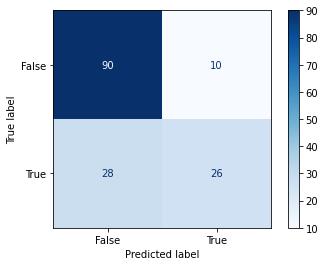

In [70]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels = [False, True])
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()